# DSM020 CW1


## Shu Wang Lo
## July 2022

### 1. Introduction/Context

In [ ]:
#Outline the idea behind your project (i.e. context, significance, expected outcomes.)
#Brief description of data set (or output a sample), including relevant information (i.e. how it was obtained.)

The goal of this proposal is to ascertain the extent of the economic impact that the Covid-19 pandemic has had on local businesses from a geographic and business sector perspective in the city of San Francisco. Using data provided by the city itself, we will be able to determine exactly which districts and business sectors have been disproportionately affected by the pandemic. This will allow us to make a proposal for which areas and sectors should be targeted to provide the most impact for government aid and business loans. 
    
The data used in this proposal was made available by the City of San Francisco via its website DataSF (data.sfgov.org). Two data sets were used in the process; one that contained a list of registered businesses sorted by their geographic location, which contained additional information on the start/end dates of the business and the nature of their business, and another data set that contained additional data on the types of business sectors each company operated in.  

San Francisco is the largest economic hub on the west coast of the United States and its economic health is considered an indicator for the region as a whole. Although San Francisco suffered relatively few Covid-related deaths relative to its size due to stringent shelter-in-place and curfew orders, these orders had a serious effect on local businesses. To help combat these effects, the city government has offered loans to businesses. 

### 2. Data Processing

In [ ]:
#Import Data
#Data Processing Steps
#Briefly detail what you intend to do with the data. You are not expected to explain the exact techniques you will use, though it is important that you identify your process as you work and any high-level features of the data.
#Explain what programming techniques you have used in the preparation of your data. (including any command-line or SQL programming.)

The amount of data contained in these files is vast and will require extensive processing. Each one has over 250,000 rows of data which is significantly more than was allowed or required for analysis. The data contains a number of columns which will not be strictly necessary for our analyses and also historical data that goes as far back as the 60s.

As we were interested only in the effects of the Covid-19 pandemic on local businesses, the first step was to eliminate any data on businesses that closed before the start of the pandemic. The coronavirus was first reported in mid-December of 2019, so we’ve chosen to use January 1, 2020 as a convenient start date to begin our analysis. We will drop all data from companies that closed before January 1, 2017. This will allow us to do a proper comparison between conditions before and during the pandemic. 

As mentioned before, a large number or columns were also eliminated. Mostly these were because the data contained in them was not strictly necessary to perform the analysis, but keeping the overall size of the data file down was also a major concern. In the following code shows the exploratory analysis into the columns that I eliminated and why I did so. Generally the data was either irrelevant, dirty or very incomplete. 


In [ ]:
# In these area I outline briefly the steps I took to change the ORIGINAL dataset to what is is now. 
# The altered dataset was included the assignment submission but the original dataset can be found at the source. 
# The original datasource is not present so this code can not be run. 

#Import the original dataset
data = pd.read_csv(r'BusinessLocationsSF.csv', low_memory = False)

# Drop several columns with data that will not be necessary for analysis
# These columns contain information on parking permits and taxes, they are not useful for our analysis.
mixedDataTypes = data.iloc[:,[12,13,14,15,20,21]]
mixedDataTypes.head()
mixedDataTypes.shape
mixedDataTypes.info()

# Continue exploration process by examining the contents of the removed columns
mixedDataTypes['LIC Code'].value_counts()

# The data in the datasets is mostly set to 'object'. I attempt to use Python to automatically determine the best data type for each column
dataL.infer_objects().dtypes 
# It does not provide any useful results

# Identify all columns that have data type 'object'
objectCol = data.select_dtypes(include=['object']).columns
for col in data.columns:
    if data[col].dtype == 'object':
        if data[col].nunique() < 100:
            data[col].astype('category')
            
# I check the 'State' column to check the values
dataL['State'].value_counts()
#the results here are notable because it shows that there are errors in the data; there are only 50 US states and 2 territories, there should not be so many entries. 

# In this step we attempt to identify a possible fix for the 'State' data
df1.info()
df1['Mail State'].describe()
df1['Mail State'].cat.categories
df1[df1['Mail State'] == 'SF'] #drop this row ('SF' is not a state)
df1[df1['Mail State'] == 'ZZ'] #drop these rows (there is no state 'ZZ')
#The data in the 'State' column COULD be useful, but it is far too dirty only of slight importance, so we remove it.

# We check the 'City' column to see if its useful
df1['City'].cat.categories
# The data here is very dirty and does not appear to be useful. 

# We check the 'Zipcode' column to see if its useful
df1['Source Zipcode'].cat.categories
# The data here is similarly very dirty. A lot of the entries do not even fit the standard format for a US zip code

# In this step we change several columns to new data types to make them easier to examine
df1 = dataL.astype({ 'City':'category', 
                  'State':'category', 
                  'Source Zipcode':'category',
                  'Business Start Date':'datetime64', 
                  'Business End Date':'datetime64', 
                  'Location Start Date':'datetime64',
                  'Location End Date':'datetime64', 
                  'Mail City':'category', 
                  'Mail Zipcode':'category',
                  'Mail State':'category', 
                 })

#Further break down dataset into businesses still in operation (no end date) and those that closed during Covid-19 (has an end date between 2020-01-01 and the current date)
dataL_extant = dataL_sorted2[dataL_sorted2['Business End Date'].isnull()]
dataL_extinct = dataL_sorted2[dataL_sorted2['Business End Date'].notna()]

#Repeat the same steps with DataE 
dataE['Business Start Date'] = pd.to_datetime(dataE['Business End Date'])
dataE['Business End Date'] = pd.to_datetime(dataE['Business End Date'])
dataE_sorted1 = dataE.sort_values(by = ['Business End Date'], axis = 0, ascending = False, inplace = False, na_position = 'first')
dataE_sorted2 = dataE_sorted1[~(dataE_sorted1['Business End Date'] < '2020-01-01')]

dataL_extant.groupby(['Neighborhoods - Analysis Boundaries']).count()/len(dataL_extant)*100
dataL_extinct.groupby(['Neighborhoods - Analysis Boundaries']).count()/len(dataL_extinct)*100
dataL_sorted2.groupby(['Neighborhoods - Analysis Boundaries']).count()/len(dataL_sorted2)*100

#end here

#Sort data by Business End Date in descending order, with rows WITHOUT end dates at the top of the dataframe
dataL_sorted1 = dataL.sort_values(by = ['Business End Date'], axis = 0, ascending = False, inplace = False, na_position = 'first')

#Filter out all businesses that closed before the effects of Covid-19 began e.g. have a business end date before 2020-01-01
dataL_sorted2 = dataL_sorted1[~(dataL_sorted1['Business End Date'] < '2020-01-01')]



This next section of data processing involves modified data file that has been submitted with the assignment. 

After removing a number of the columns and data that dates before the relevant period, we now attempt to determine the exact impact of the pandemic on the closure rates of businesses in different sectors by comparing closure rates before and after the pandemic. 

In [267]:
# We begin by importing the required packages
import pandas as pd
import numpy as np
import scipy as si
import sklearn as sk

# Load dataset
# The data set used here is the modified dataset that was icnluded with the assigment submission.
data = pd.read_csv(r'Business Locations SF Lite 2.csv', low_memory = False)


For reference, the dictionary included here shows the correlation between the numeric code in the 'NAICS Code Description' column and the actual business sector it refers to. 

Our hypothesis at this point is that more traditional brick and mortar service-oriented businesses such as restaurants, retail, and recreation would be the business sectors most seriously impacted by the pandemic. Consequently, we will be grouping these sectors under the blanket name of "Group B" (Codes 4, 10, 11, 13, 14) while all business sectors that are more 'remote' in nature are grouped under "Group A" (Codes 1, 2, 3, 7, 8, 9, 12, 16, 17, 18), which we expect to have been less affected by the pandemic. 


In [268]:
# NAICS Code Reference Dictionary
NAICS = {'1' : 'Construction',
         '2' : 'Food Services',
         '3' : 'Retail Trade',
         '4' : 'Professional, Scientific, and Technical Services',
         '5' : 'Certain Services',
         '6' : 'Multiple',
         '7' : 'Private Education and Health Services',
         '8' : 'Accommodations',
         '9' : 'Arts, Entertainment, and Recreation',
         '10' : 'Administrative and Support Services',
         '11' : 'Financial Services',
         '12' : 'Real Estate and Rental and Leasing Services',
         '13' : 'Insurance',
         '14' : 'Information',
         '15' : 'Transportation and Warehousing',
         '16' : 'Wholesale Trade',
         '17' : 'Manufacturing',
         '18' : 'Utilities'}


Before we begin our comparison between Groups A and B, we first want an idea of how businesses as a whole have done. The code below generates a histogram of the number of businesses closed per month per year in San Francisco from Jan 2017 onwards. 

The odd shape of the graph, however, does merit some discussion. There do seem to be slightly more business closures after Jan 2020 which is what we hypothesized. However appears to be several pretty massive spikes that don't seem to be correlated with anything. The single massive spike in June 2018 should be indicative of the 2018 financial crisis, but the preceding and later months do not show the same dramatic spike, leading to my belief that someother issue is present. My best guess is that the issue may be administrative in nature. A noticeable number of rows contain idential business start and end dates around this time and may be a contributing factor to the data spike.

<AxesSubplot:xlabel='Business End Date,Business End Date'>

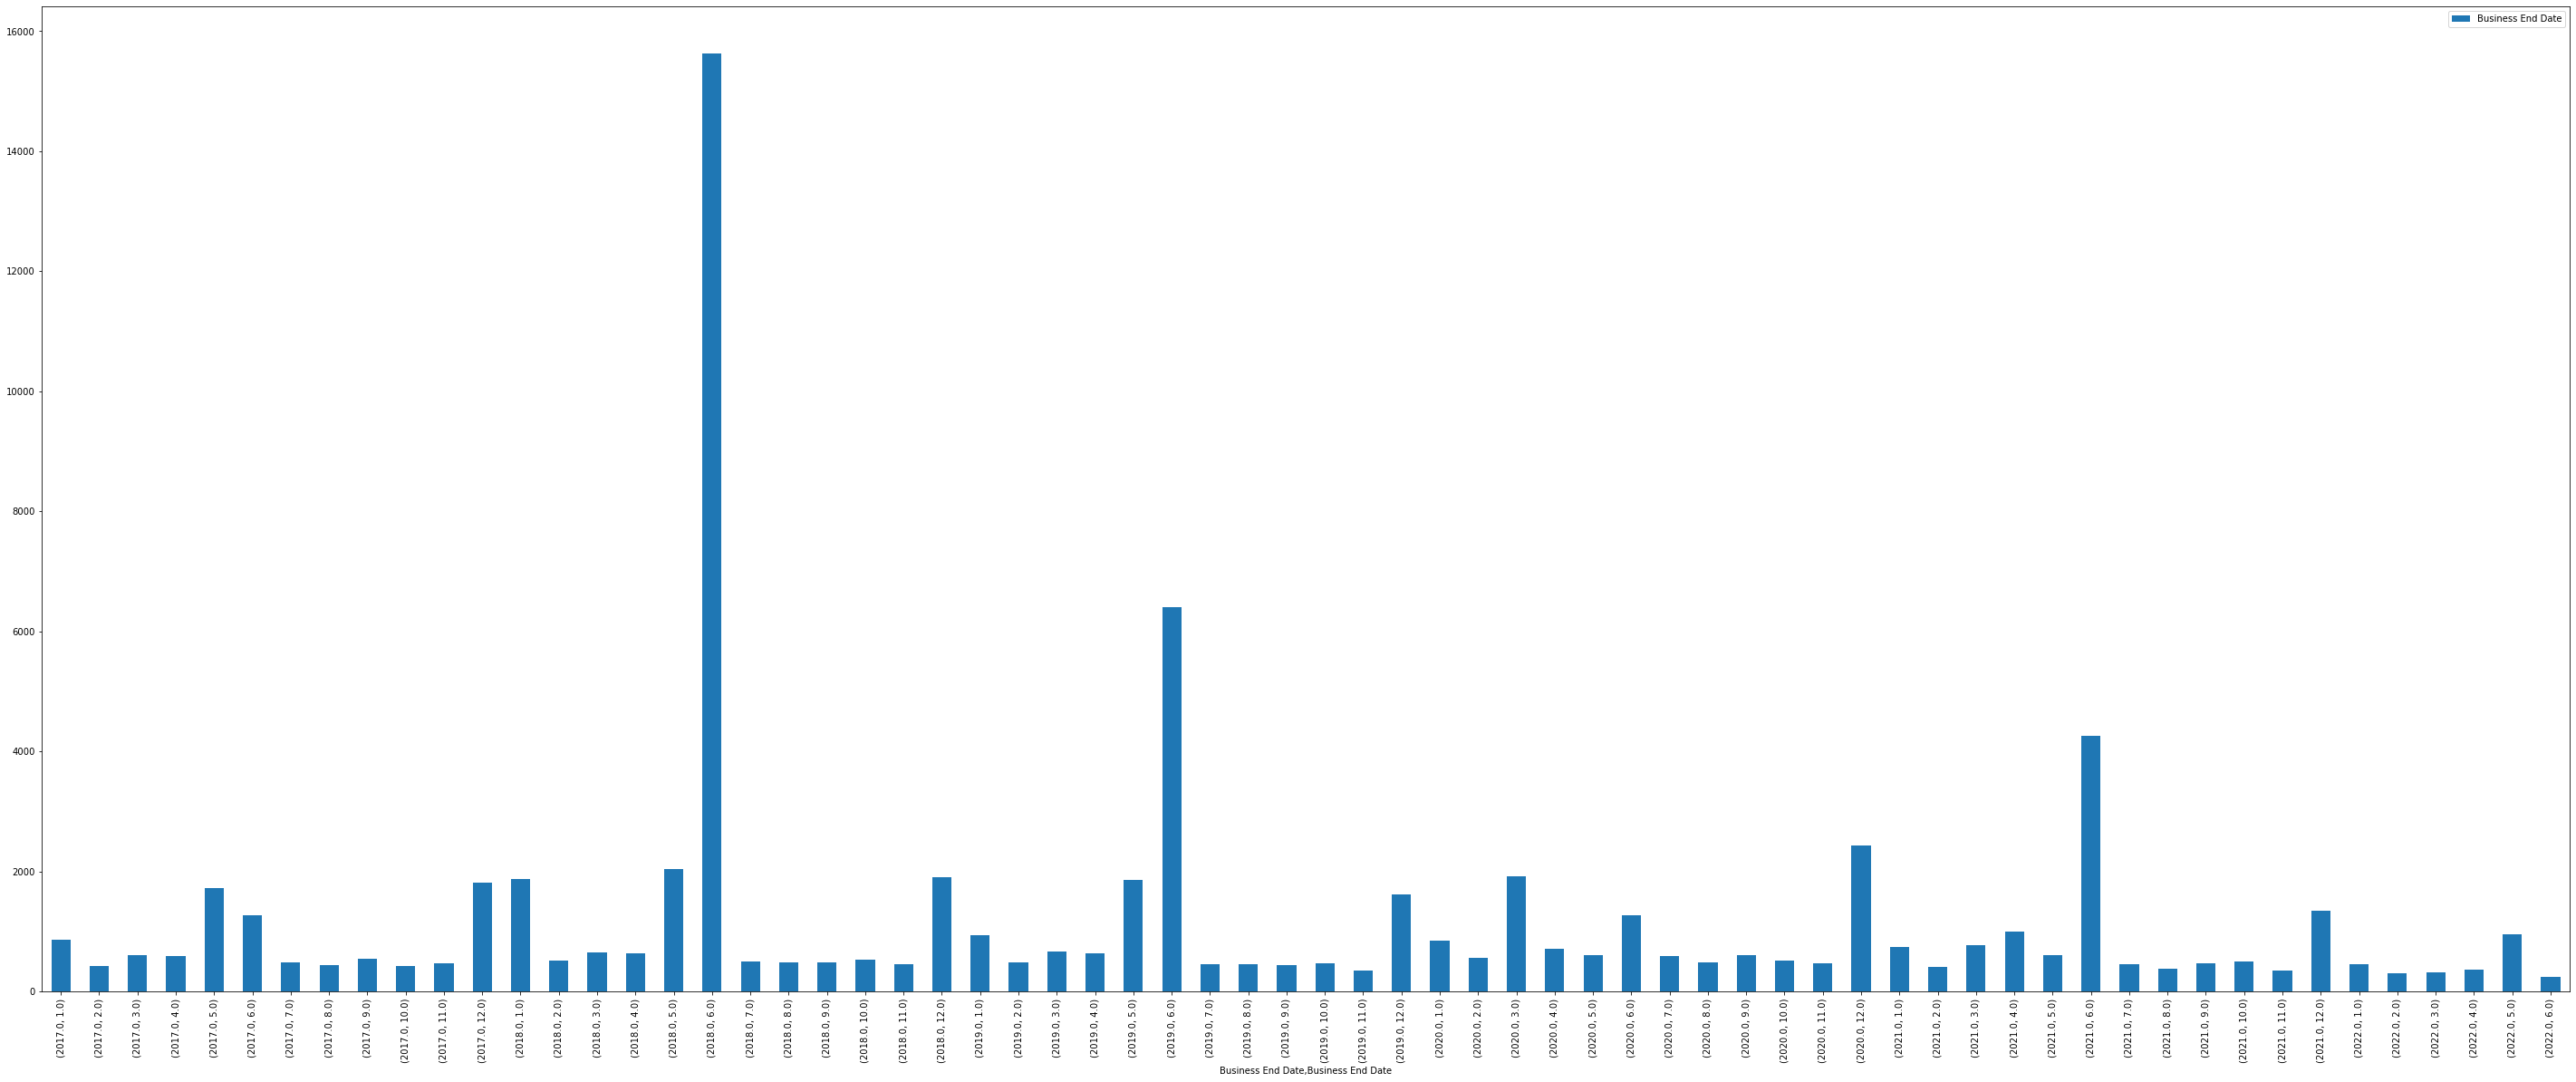

In [269]:
# Business closures by month by year

data['Business End Date'] = data['Business End Date'].astype("datetime64")
(dataN1
 .groupby([data['Business End Date'].dt.year, data['Business End Date'].dt.month])
 [['Business End Date']]
 .count()
 .plot(kind="bar", figsize=(50,20)                             ))


Next we examine how the Construction businesses are faring. We expect the construction sector to be almost entirely unaffected by the pandemic as it is considered an 'essential' industry. Construction companies were mostly exempt from the shelter-in-place policy that was put into effect by the San Francisco goverment in March 2020.

As we can see from the chart below, the three spikes that we observed in the histogram above are still present but are thankfully less pronounced. As we hypothesized, other than the spikes there is little difference between the number of business end dates before and after the pandemic. 

/var/folders/dc/yclmmxqs4zdd3nghyrp02hq40000gn/T/ipykernel_23712/183935951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Const['Business End Date'] = data_Const['Business End Date'].astype("datetime64")


<AxesSubplot:xlabel='Business End Date,Business End Date'>

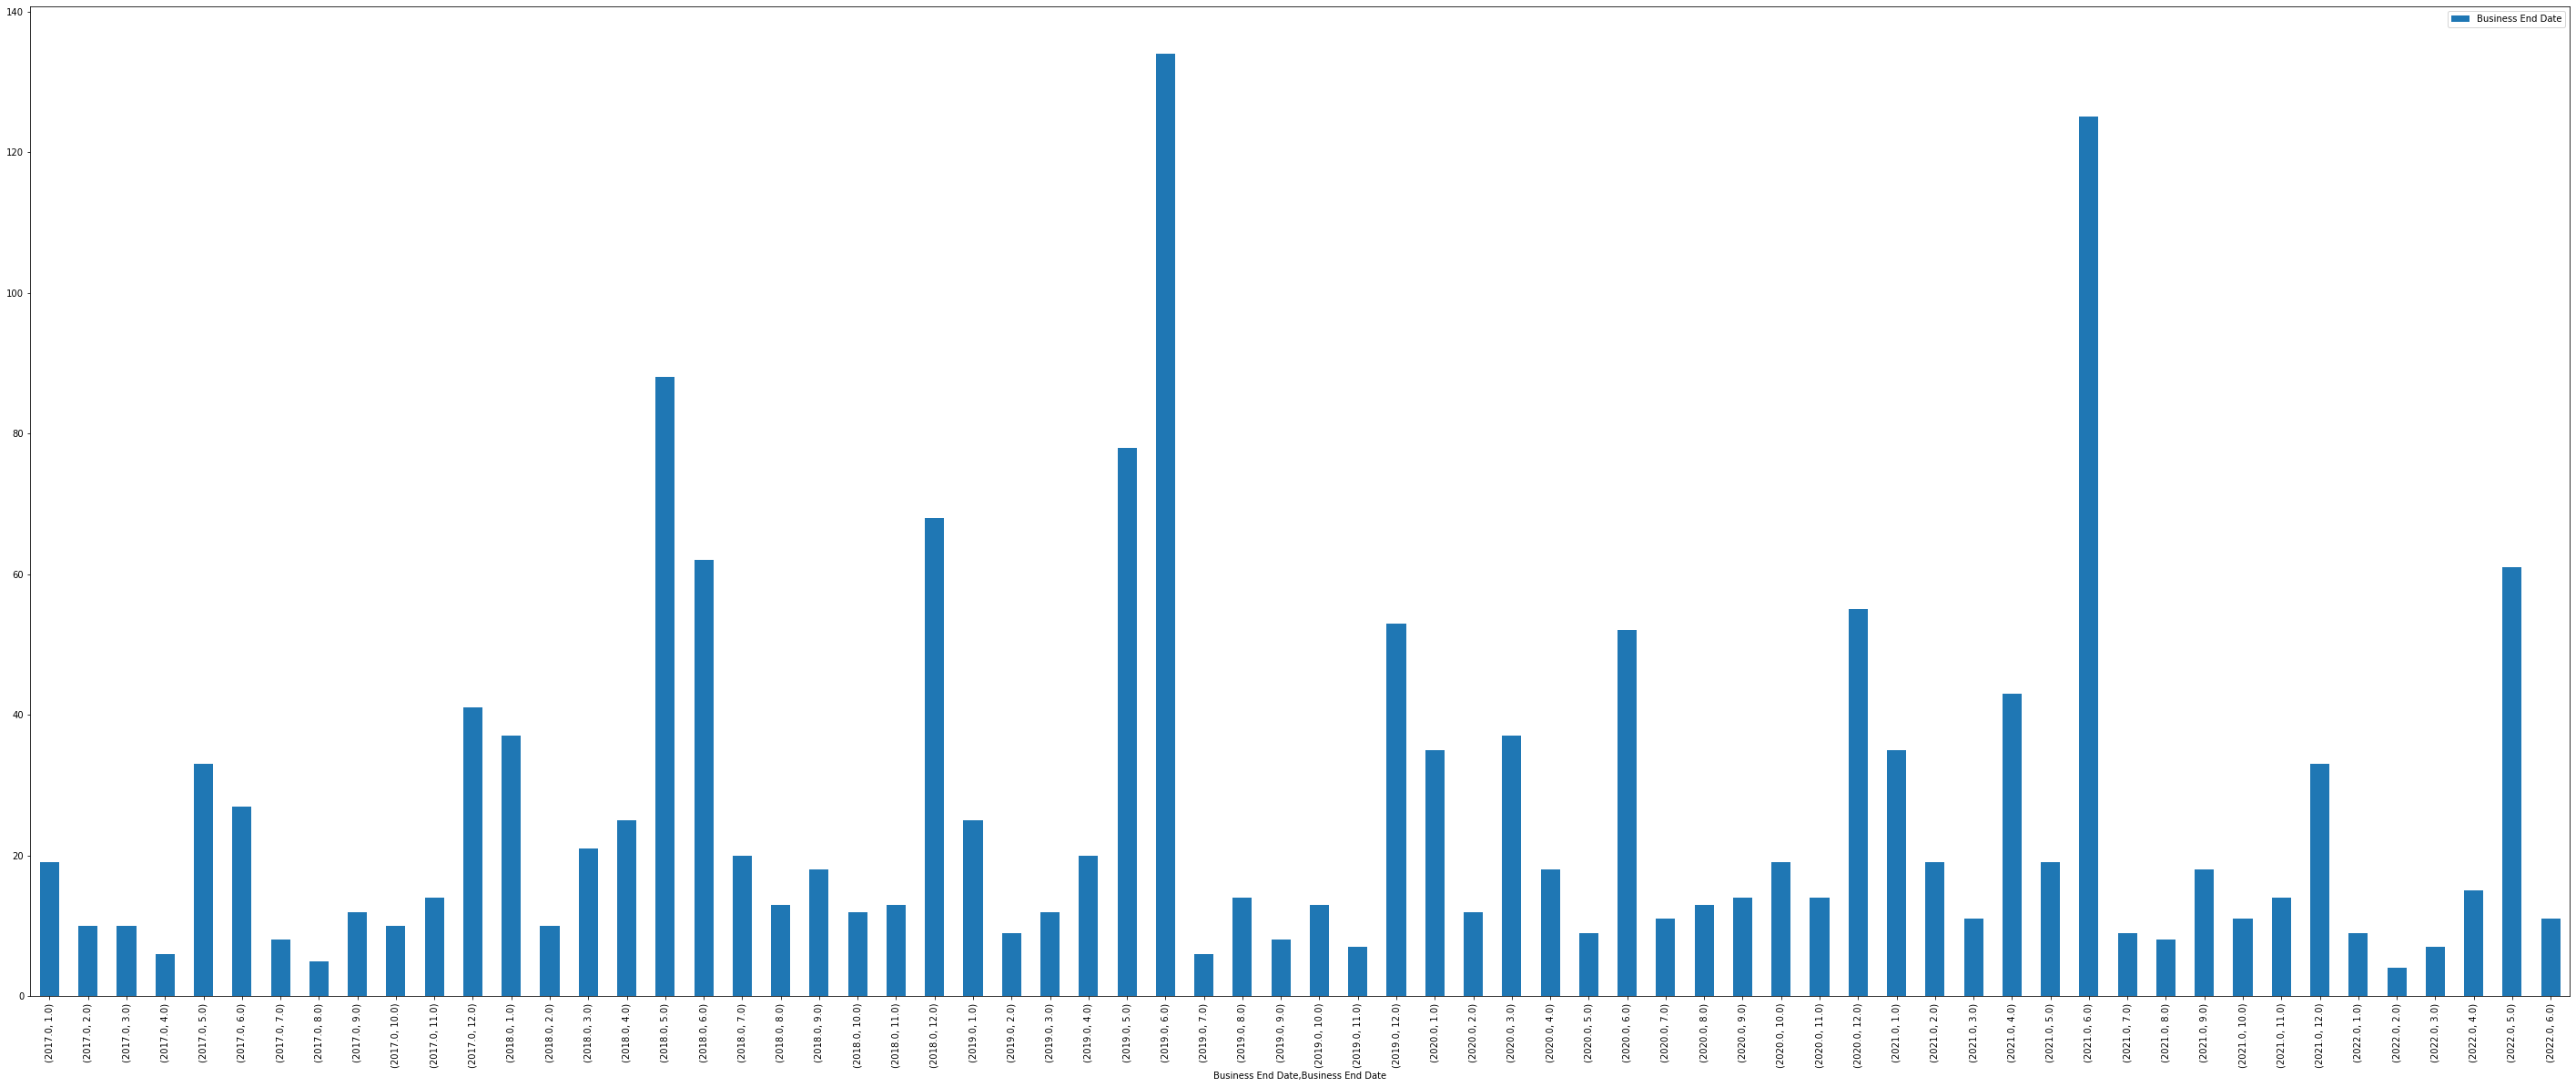

In [270]:
# Business closures by month by year for Businesses in 'Construction' sector

data_Const = data.loc[data['NAICS Code Description'] == 1]

data_Const['Business End Date'] = data_Const['Business End Date'].astype("datetime64")
(data_Const
 .groupby([data_Const['Business End Date'].dt.year, data_Const['Business End Date'].dt.month])
 [['Business End Date']]
 .count()
 .plot(kind="bar", figsize=(50,20)))


The next few charts cover the same time period but for several other business sectors. They have been selected for the large percentage of the closed businesses that they represent. 

/var/folders/dc/yclmmxqs4zdd3nghyrp02hq40000gn/T/ipykernel_23712/3685647549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNC['Business End Date'] = dataNC['Business End Date'].astype("datetime64")


<AxesSubplot:xlabel='Business End Date,Business End Date'>

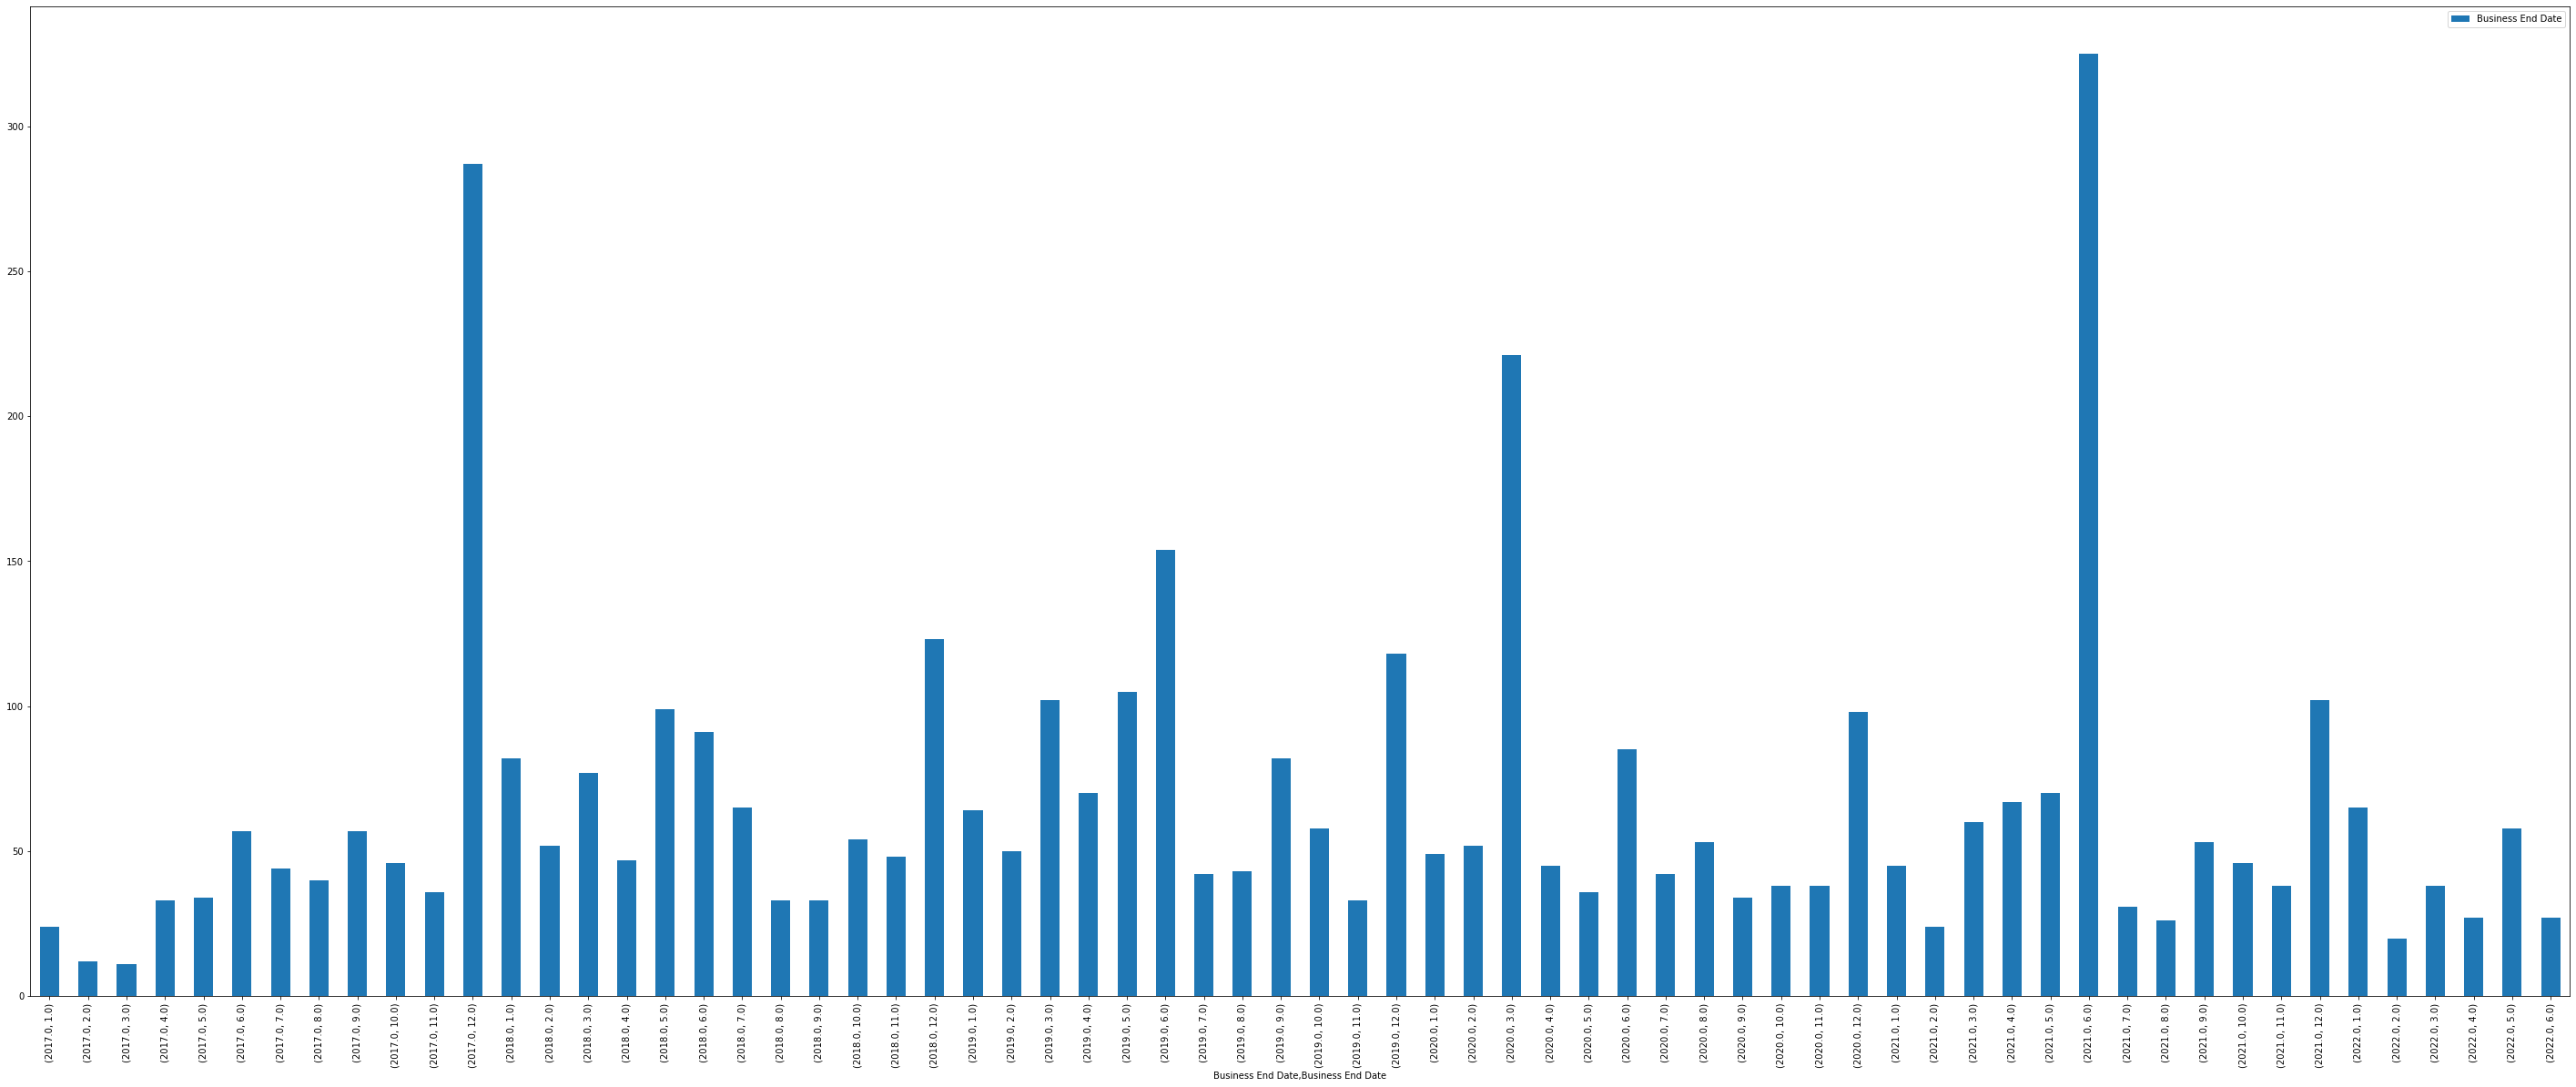

In [255]:
# Business closures by month by year for Businesses in 'Food Services' sector

dataNC = dataN.loc[dataN['NAICS Code Description'] == 2]

dataNC['Business End Date'] = dataNC['Business End Date'].astype("datetime64")
(dataNC
 .groupby([dataNC['Business End Date'].dt.year, dataNC['Business End Date'].dt.month])
 [['Business End Date']]
 .count()
 .plot(kind="bar", figsize=(50,20)))

/var/folders/dc/yclmmxqs4zdd3nghyrp02hq40000gn/T/ipykernel_23712/1570100359.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNC['Business End Date'] = dataNC['Business End Date'].astype("datetime64")


<AxesSubplot:xlabel='Business End Date,Business End Date'>

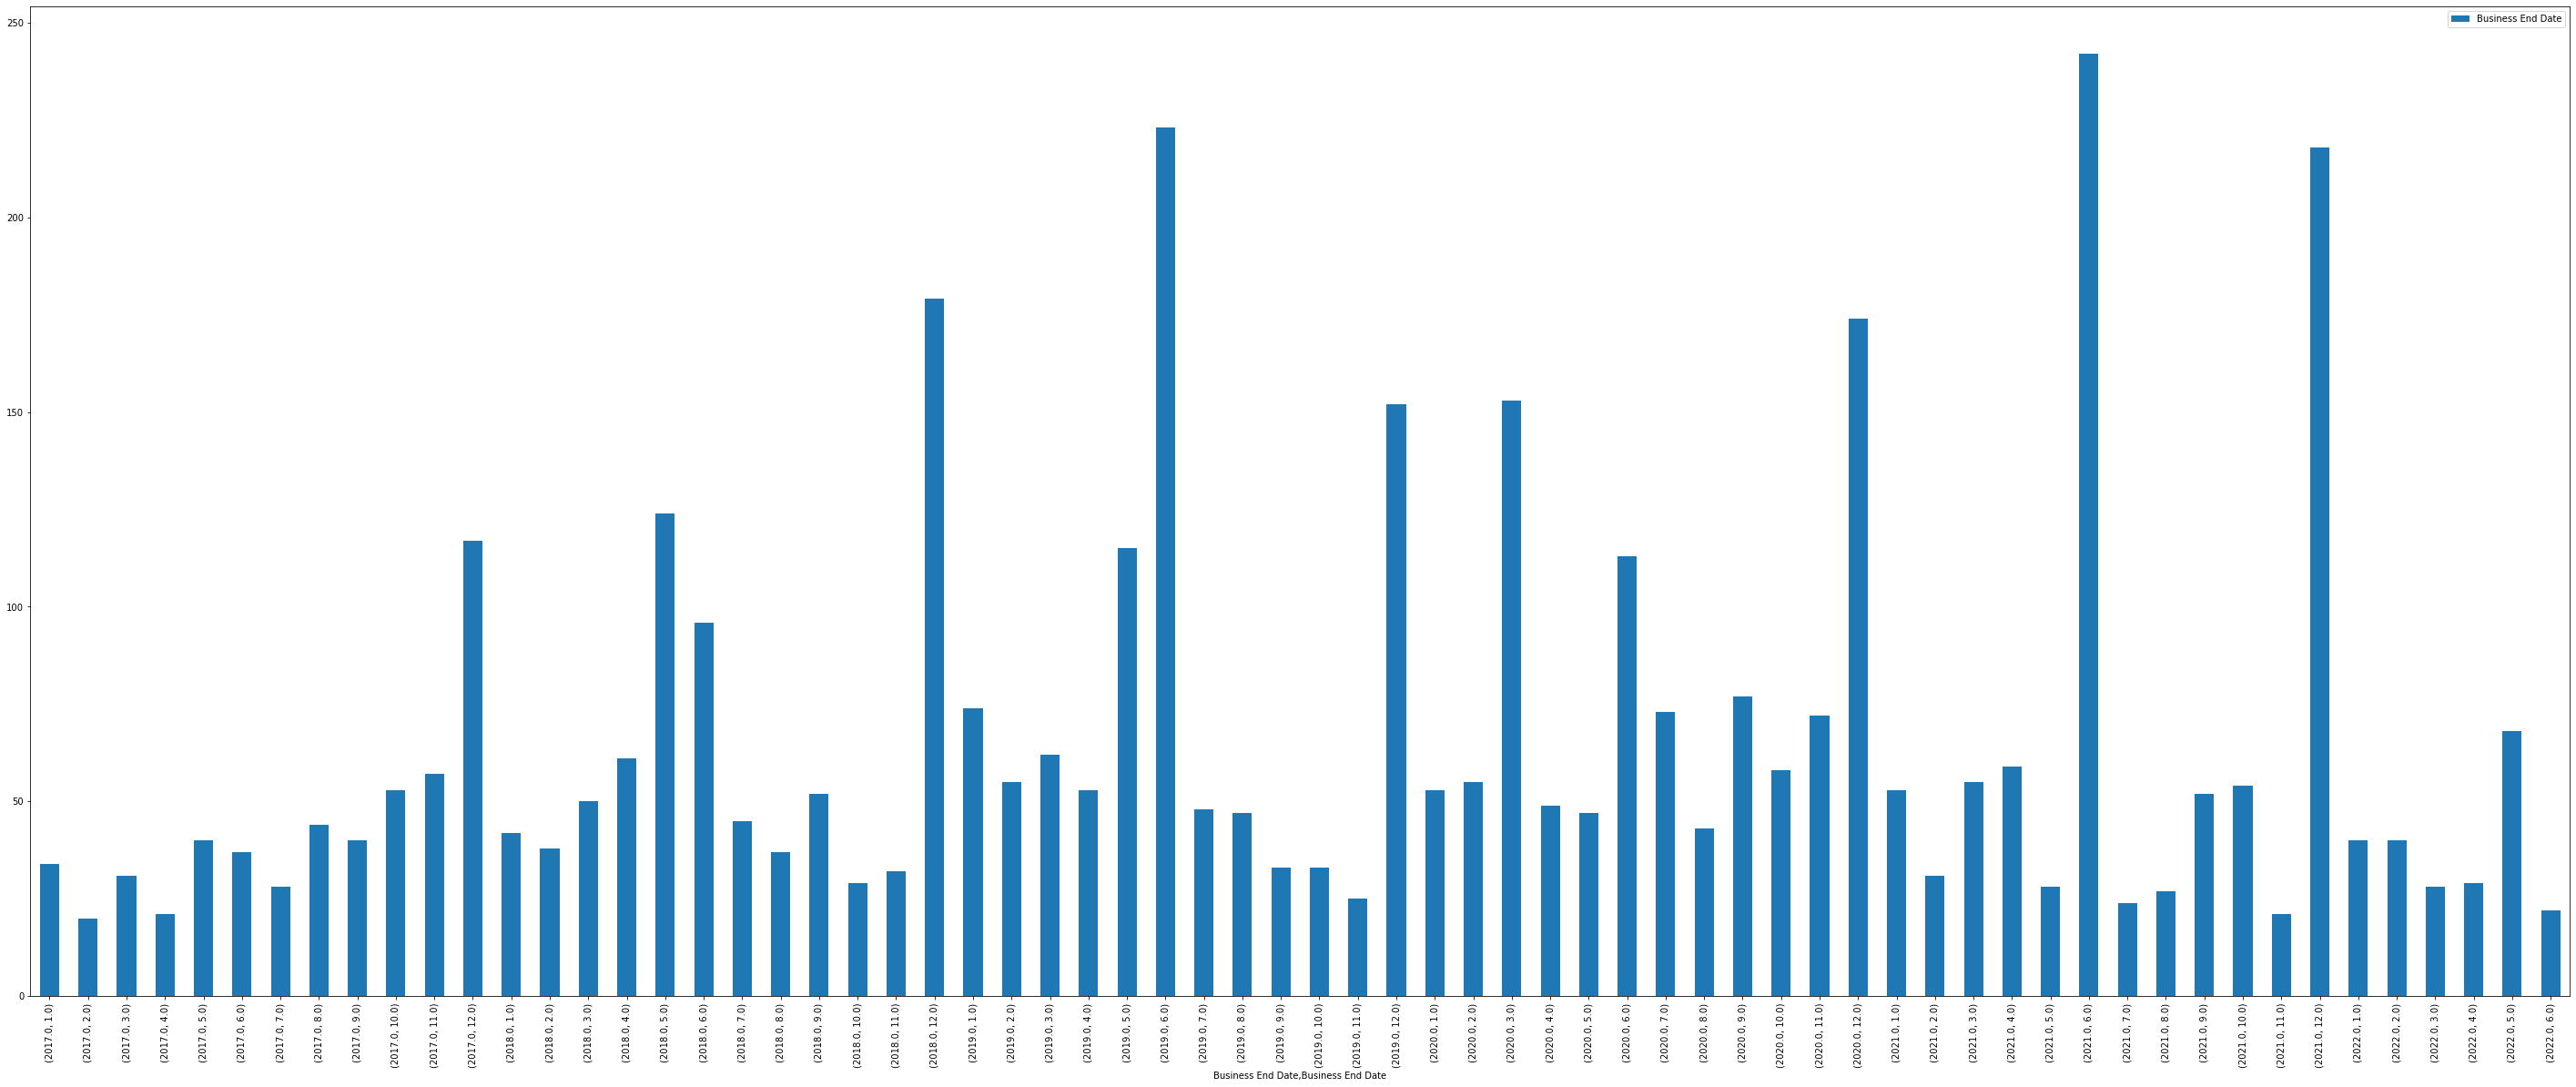

In [260]:
# Business closures by month by year for Businesses in 'Retail Trade' sector

dataNC = dataN.loc[dataN['NAICS Code Description'] == 3]

dataNC['Business End Date'] = dataNC['Business End Date'].astype("datetime64")
(dataNC
 .groupby([dataNC['Business End Date'].dt.year, dataNC['Business End Date'].dt.month])
 [['Business End Date']]
 .count()
 .plot(kind="bar", figsize=(50,20)))

/var/folders/dc/yclmmxqs4zdd3nghyrp02hq40000gn/T/ipykernel_23712/463318640.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNC['Business End Date'] = dataNC['Business End Date'].astype("datetime64")


<AxesSubplot:xlabel='Business End Date,Business End Date'>

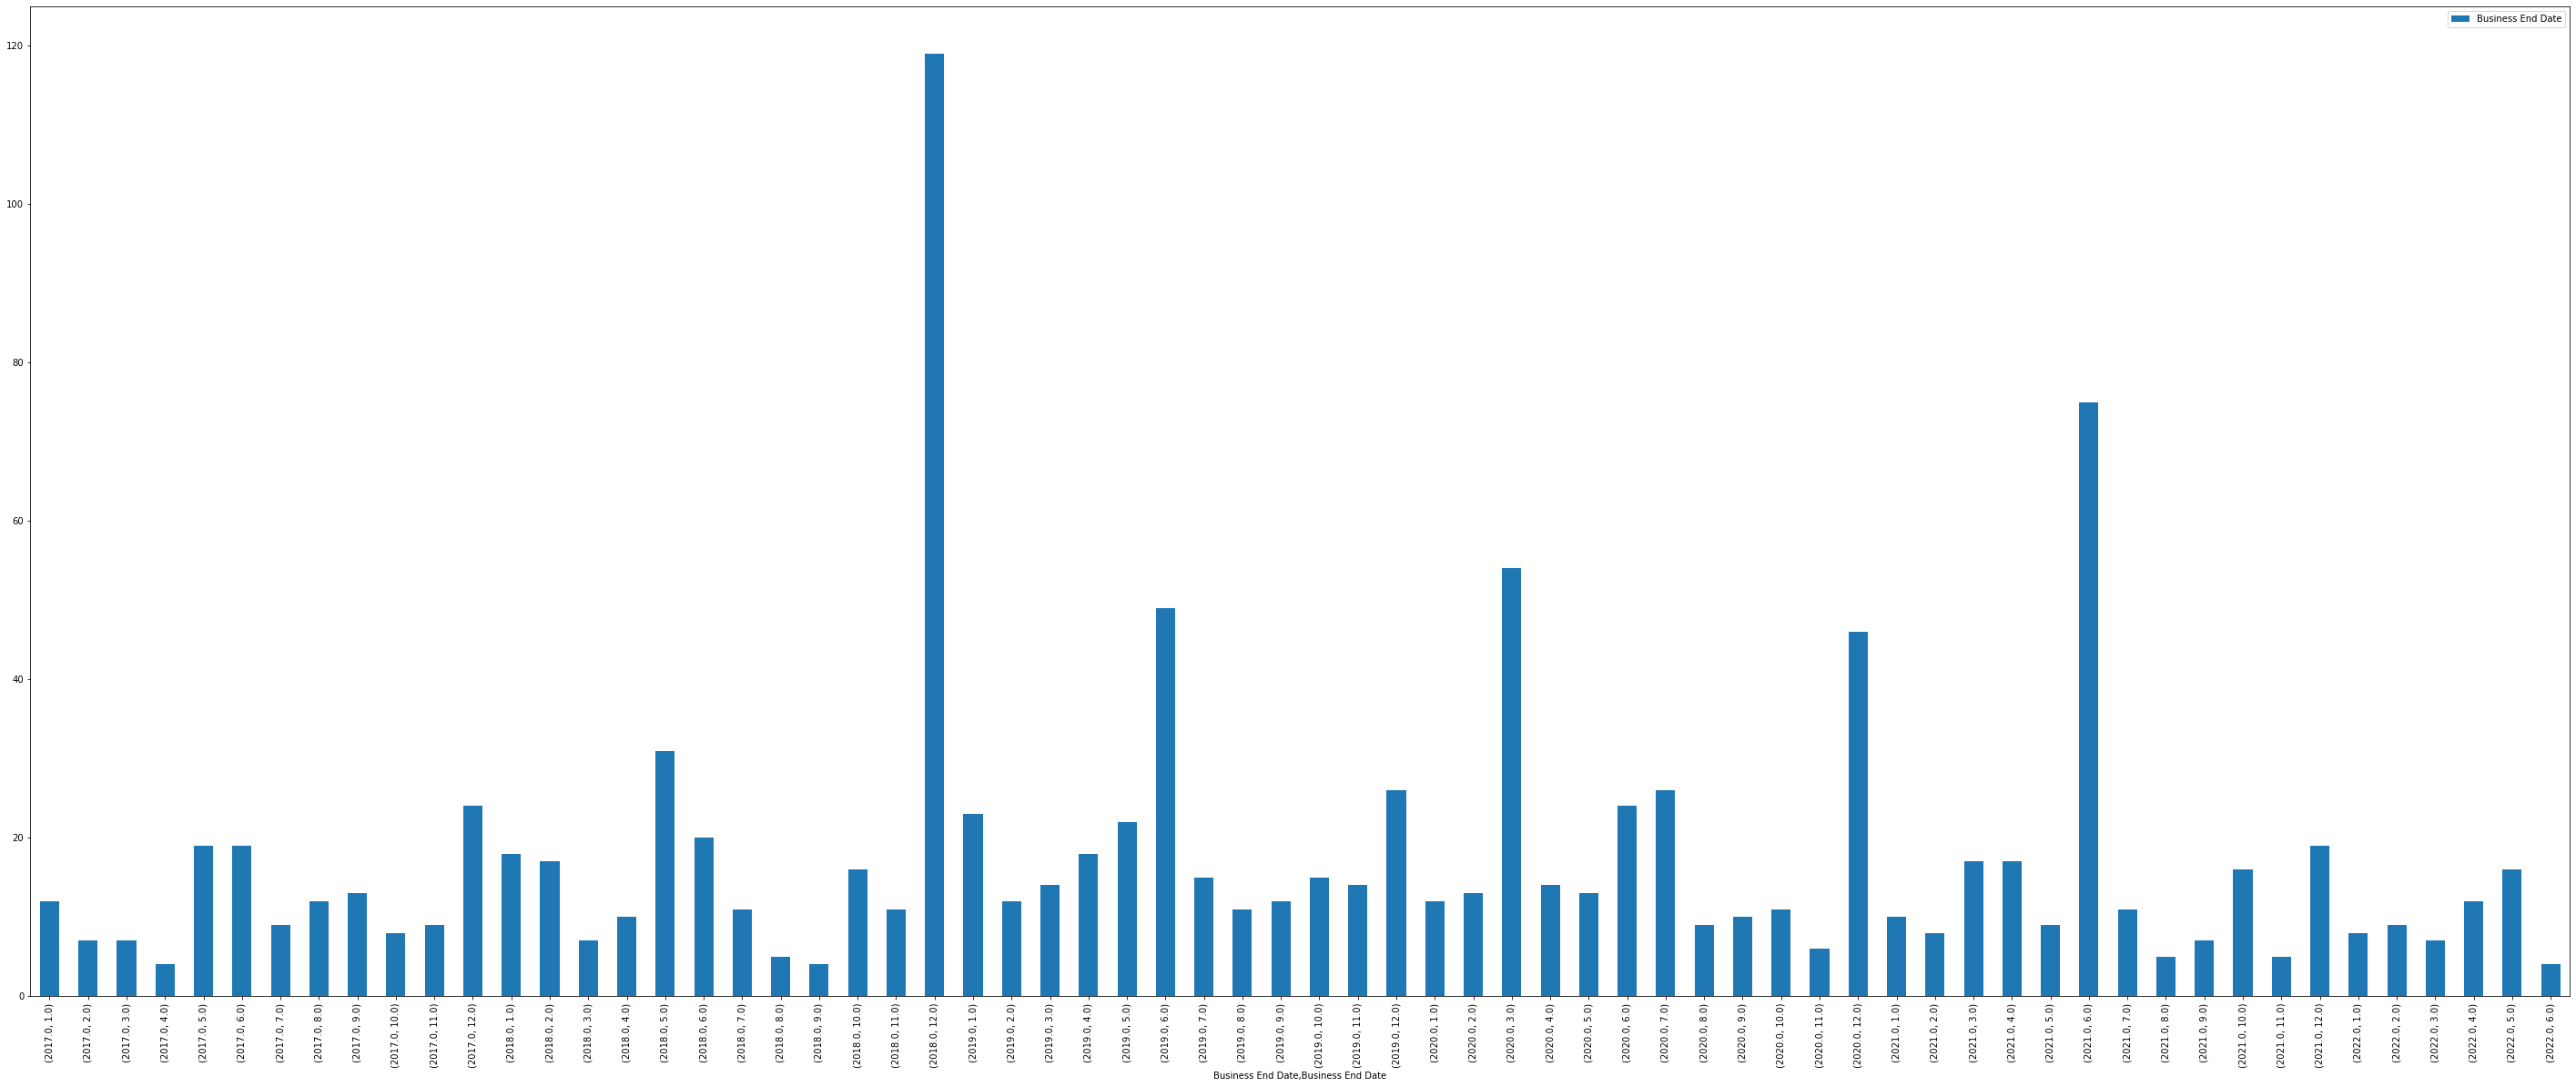

In [256]:
# Business closures by month by year for Businesses in 'Professional, Scientific, and Technical Services' sector

dataNC = dataN.loc[dataN['NAICS Code Description'] == 5]

dataNC['Business End Date'] = dataNC['Business End Date'].astype("datetime64")
(dataNC
 .groupby([dataNC['Business End Date'].dt.year, dataNC['Business End Date'].dt.month])
 [['Business End Date']]
 .count()
 .plot(kind="bar", figsize=(50,20)))

/var/folders/dc/yclmmxqs4zdd3nghyrp02hq40000gn/T/ipykernel_23712/3936998899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNC['Business End Date'] = dataNC['Business End Date'].astype("datetime64")


<AxesSubplot:xlabel='Business End Date,Business End Date'>

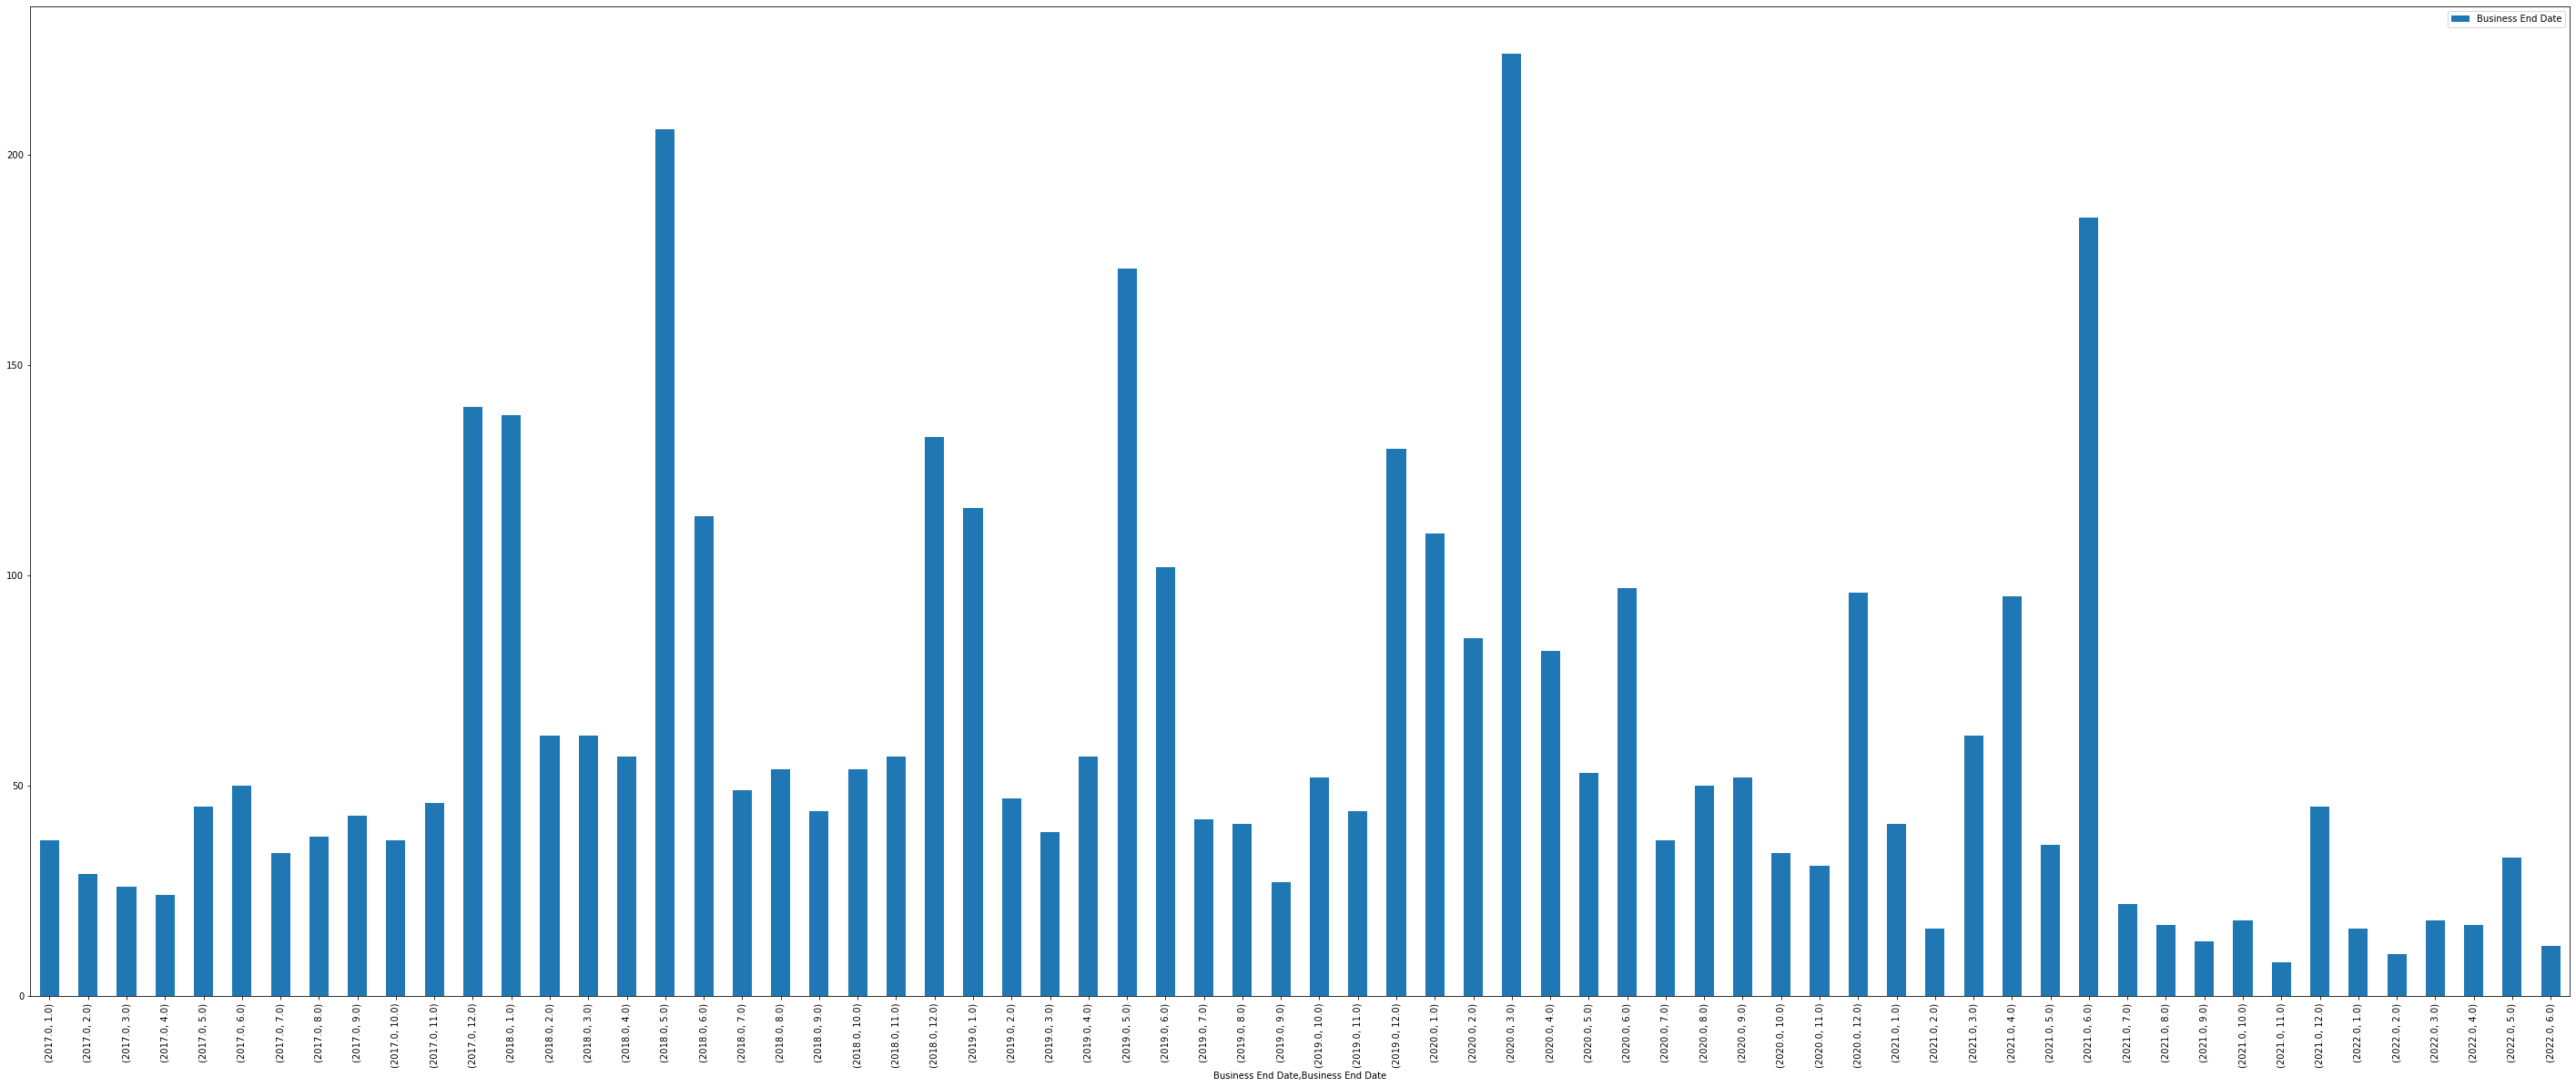

In [263]:
# Business closures by month by year for Businesses in 'Accommodations' sector

dataNC = dataN.loc[dataN['NAICS Code Description'] == 8]

dataNC['Business End Date'] = dataNC['Business End Date'].astype("datetime64")
(dataNC
 .groupby([dataNC['Business End Date'].dt.year, dataNC['Business End Date'].dt.month])
 [['Business End Date']]
 .count()
 .plot(kind="bar", figsize=(50,20)))

/var/folders/dc/yclmmxqs4zdd3nghyrp02hq40000gn/T/ipykernel_23712/916813492.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNC['Business End Date'] = dataNC['Business End Date'].astype("datetime64")


<AxesSubplot:xlabel='Business End Date,Business End Date'>

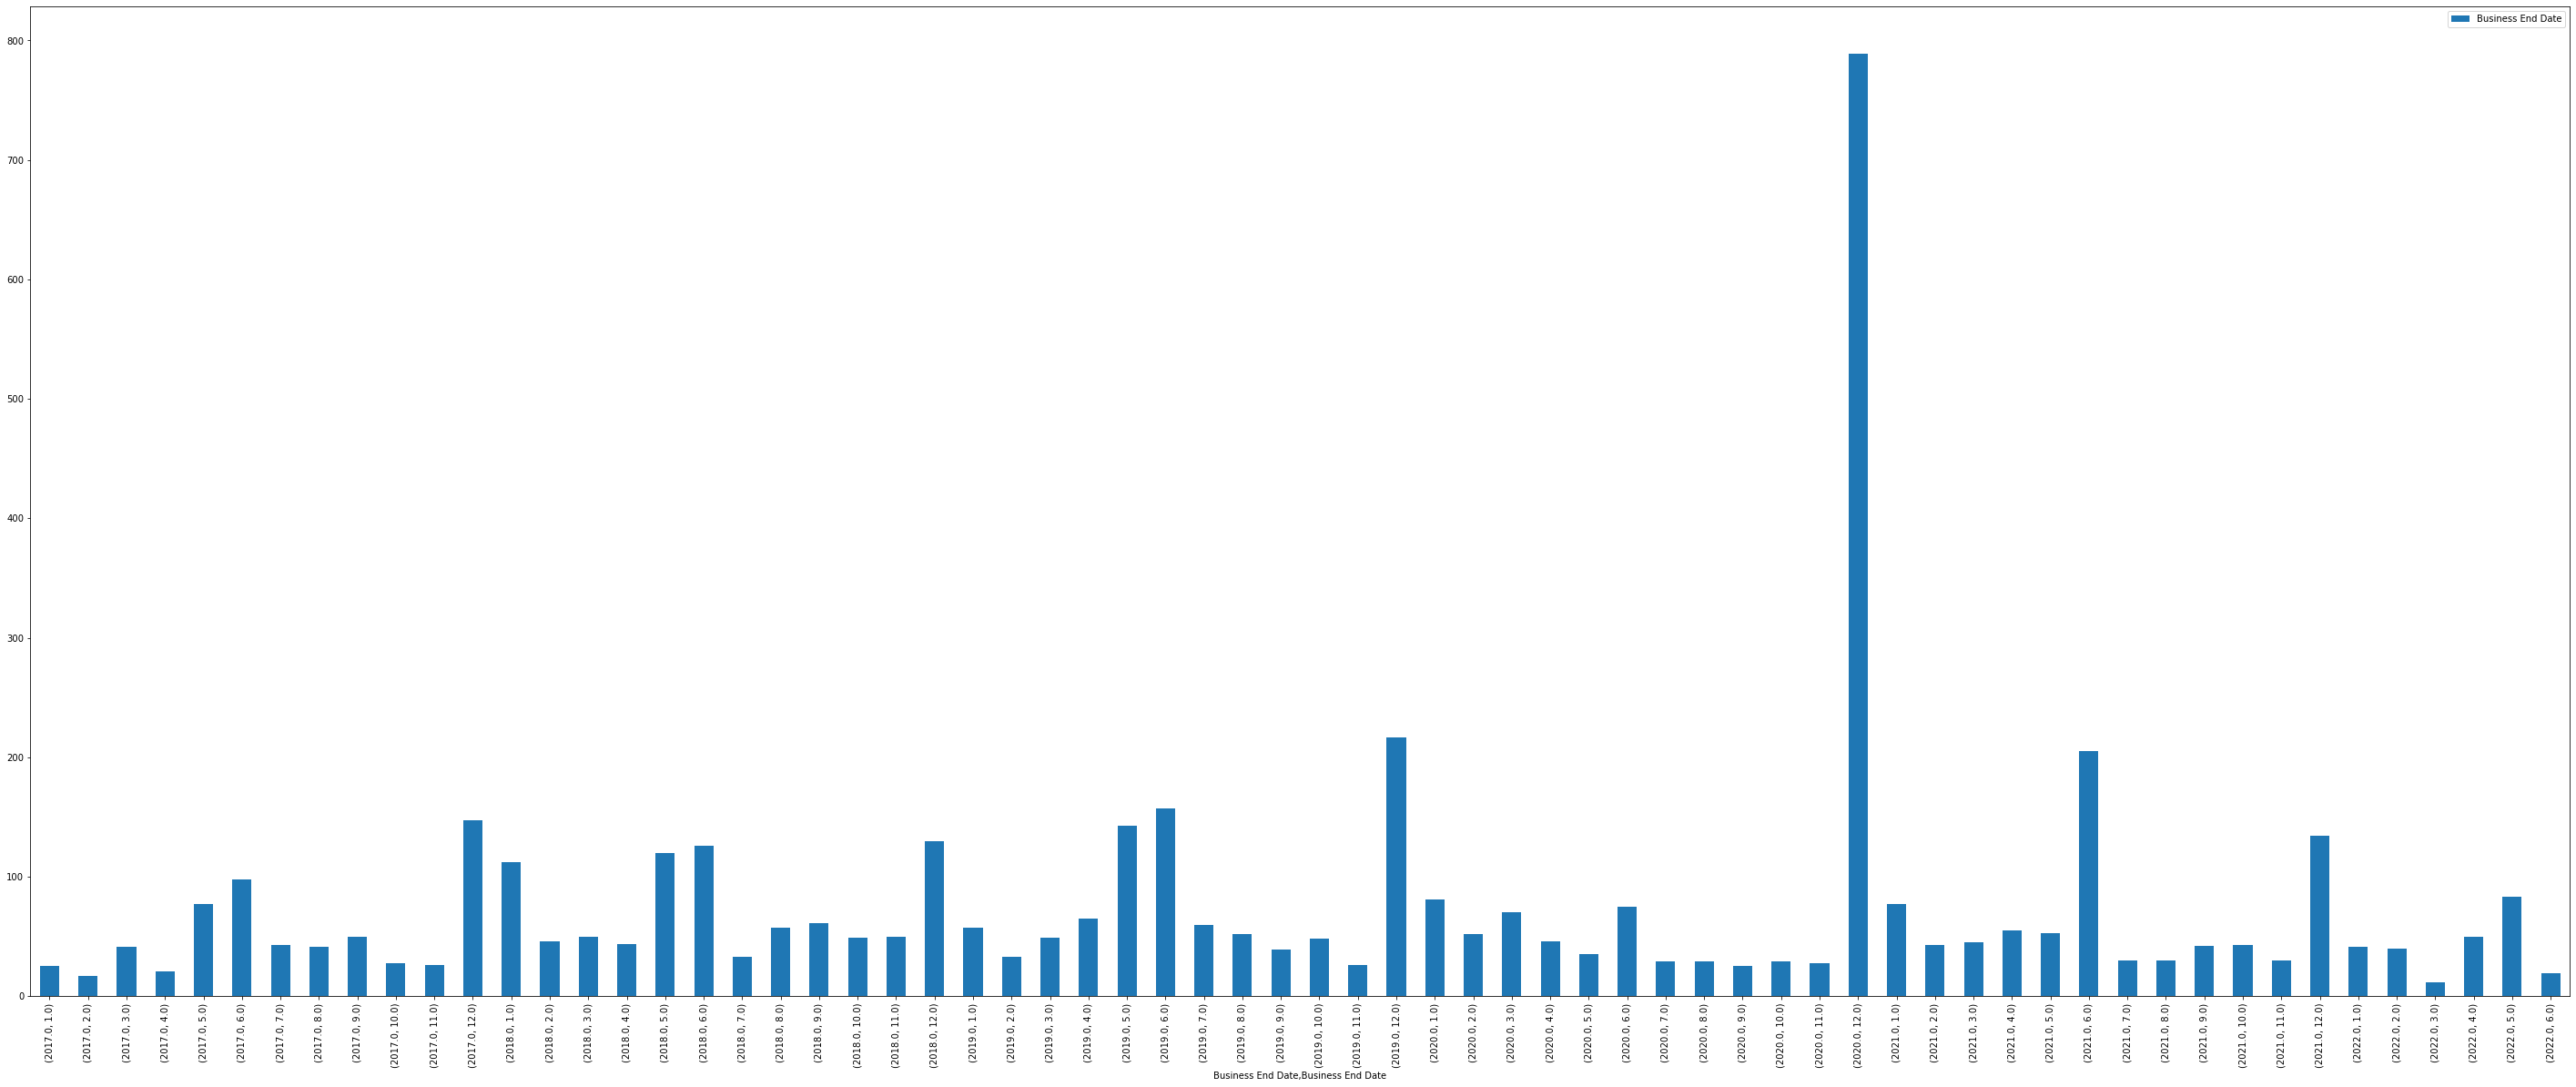

In [257]:
# Business closures by month by year for Businesses in 'Real Estate and Rental and Leasing Services' sector

dataNC = dataN.loc[dataN['NAICS Code Description'] == 12]

dataNC['Business End Date'] = dataNC['Business End Date'].astype("datetime64")
(dataNC
 .groupby([dataNC['Business End Date'].dt.year, dataNC['Business End Date'].dt.month])
 [['Business End Date']]
 .count()
 .plot(kind="bar", figsize=(50,20)))

The last two graphs show histograms of the number of businesses that closed from Jan 2017 onwards in Group A and Group B. As we hypothesized earlier, its clear from the histograms that Group B displays a very obvious increase in the number of business closures after Jan 2020, while Group A is mostly consistent before and after. 

/var/folders/dc/yclmmxqs4zdd3nghyrp02hq40000gn/T/ipykernel_23712/50946959.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNC['Business End Date'] = dataNC['Business End Date'].astype("datetime64")


<AxesSubplot:xlabel='Business End Date,Business End Date'>

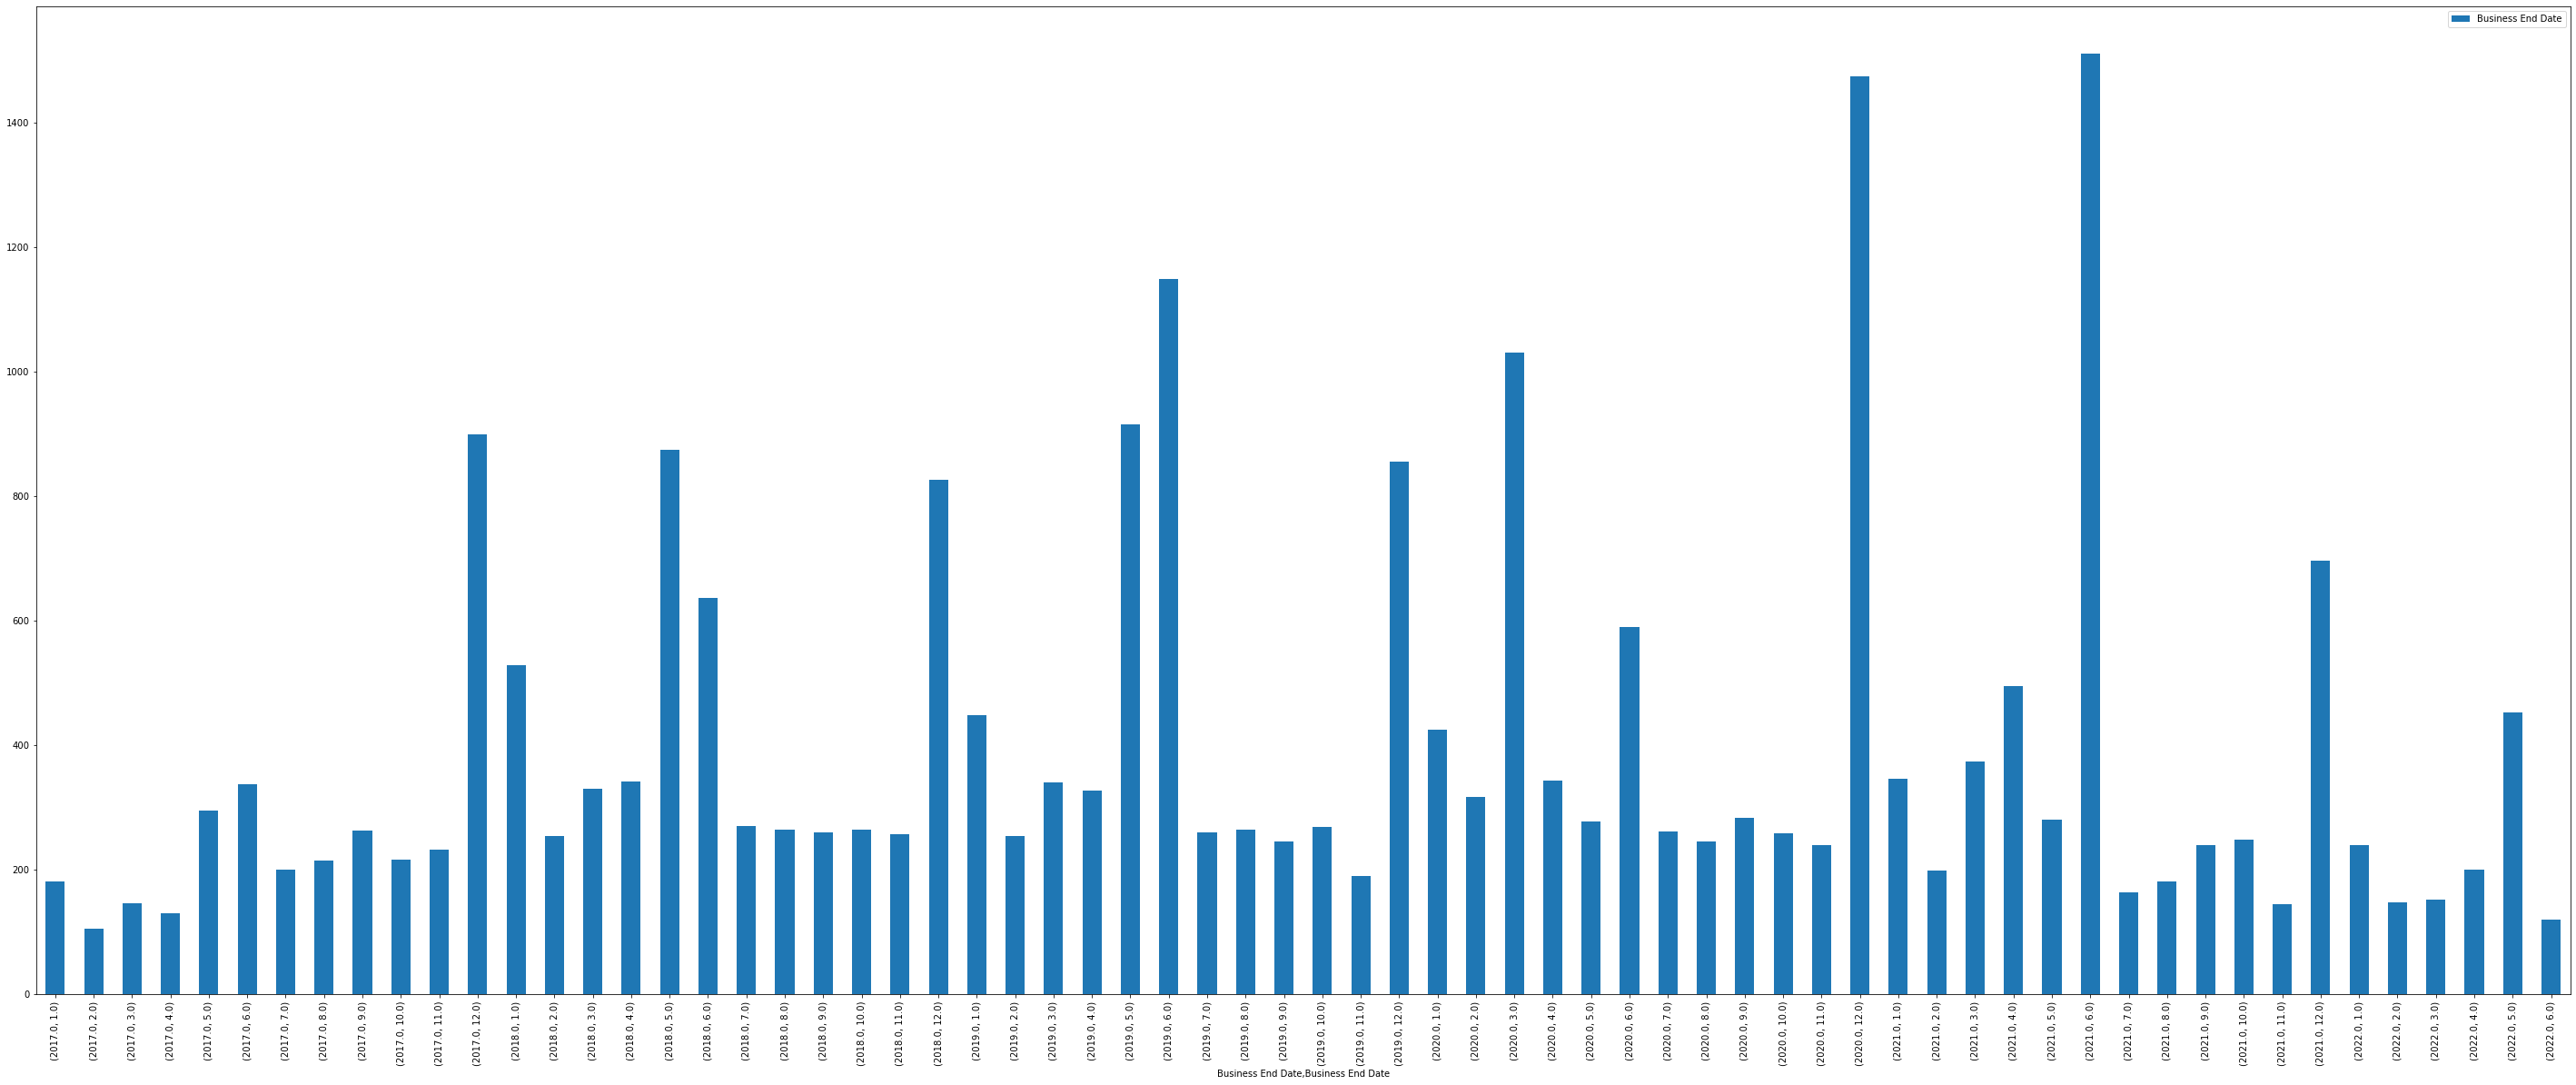

In [261]:
# Business closures by month by year for Businesses in Group A sectors

dataNC = dataN.loc[(dataN['NAICS Code Description'] == 1) | 
                   (dataN['NAICS Code Description'] == 2) |
                   (dataN['NAICS Code Description'] == 3) |
                   (dataN['NAICS Code Description'] == 7) |
                   (dataN['NAICS Code Description'] == 8) |
                   (dataN['NAICS Code Description'] == 9) |
                   (dataN['NAICS Code Description'] == 12) |
                   (dataN['NAICS Code Description'] == 16) |
                   (dataN['NAICS Code Description'] == 17) |
                   (dataN['NAICS Code Description'] == 18)]

dataNC['Business End Date'] = dataNC['Business End Date'].astype("datetime64")
(dataNC
 .groupby([dataNC['Business End Date'].dt.year, dataNC['Business End Date'].dt.month])
 [['Business End Date']]
 .count()
 .plot(kind="bar", figsize=(50,20)))

/var/folders/dc/yclmmxqs4zdd3nghyrp02hq40000gn/T/ipykernel_23712/3625100358.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNC['Business End Date'] = dataNC['Business End Date'].astype("datetime64")


<AxesSubplot:xlabel='Business End Date,Business End Date'>

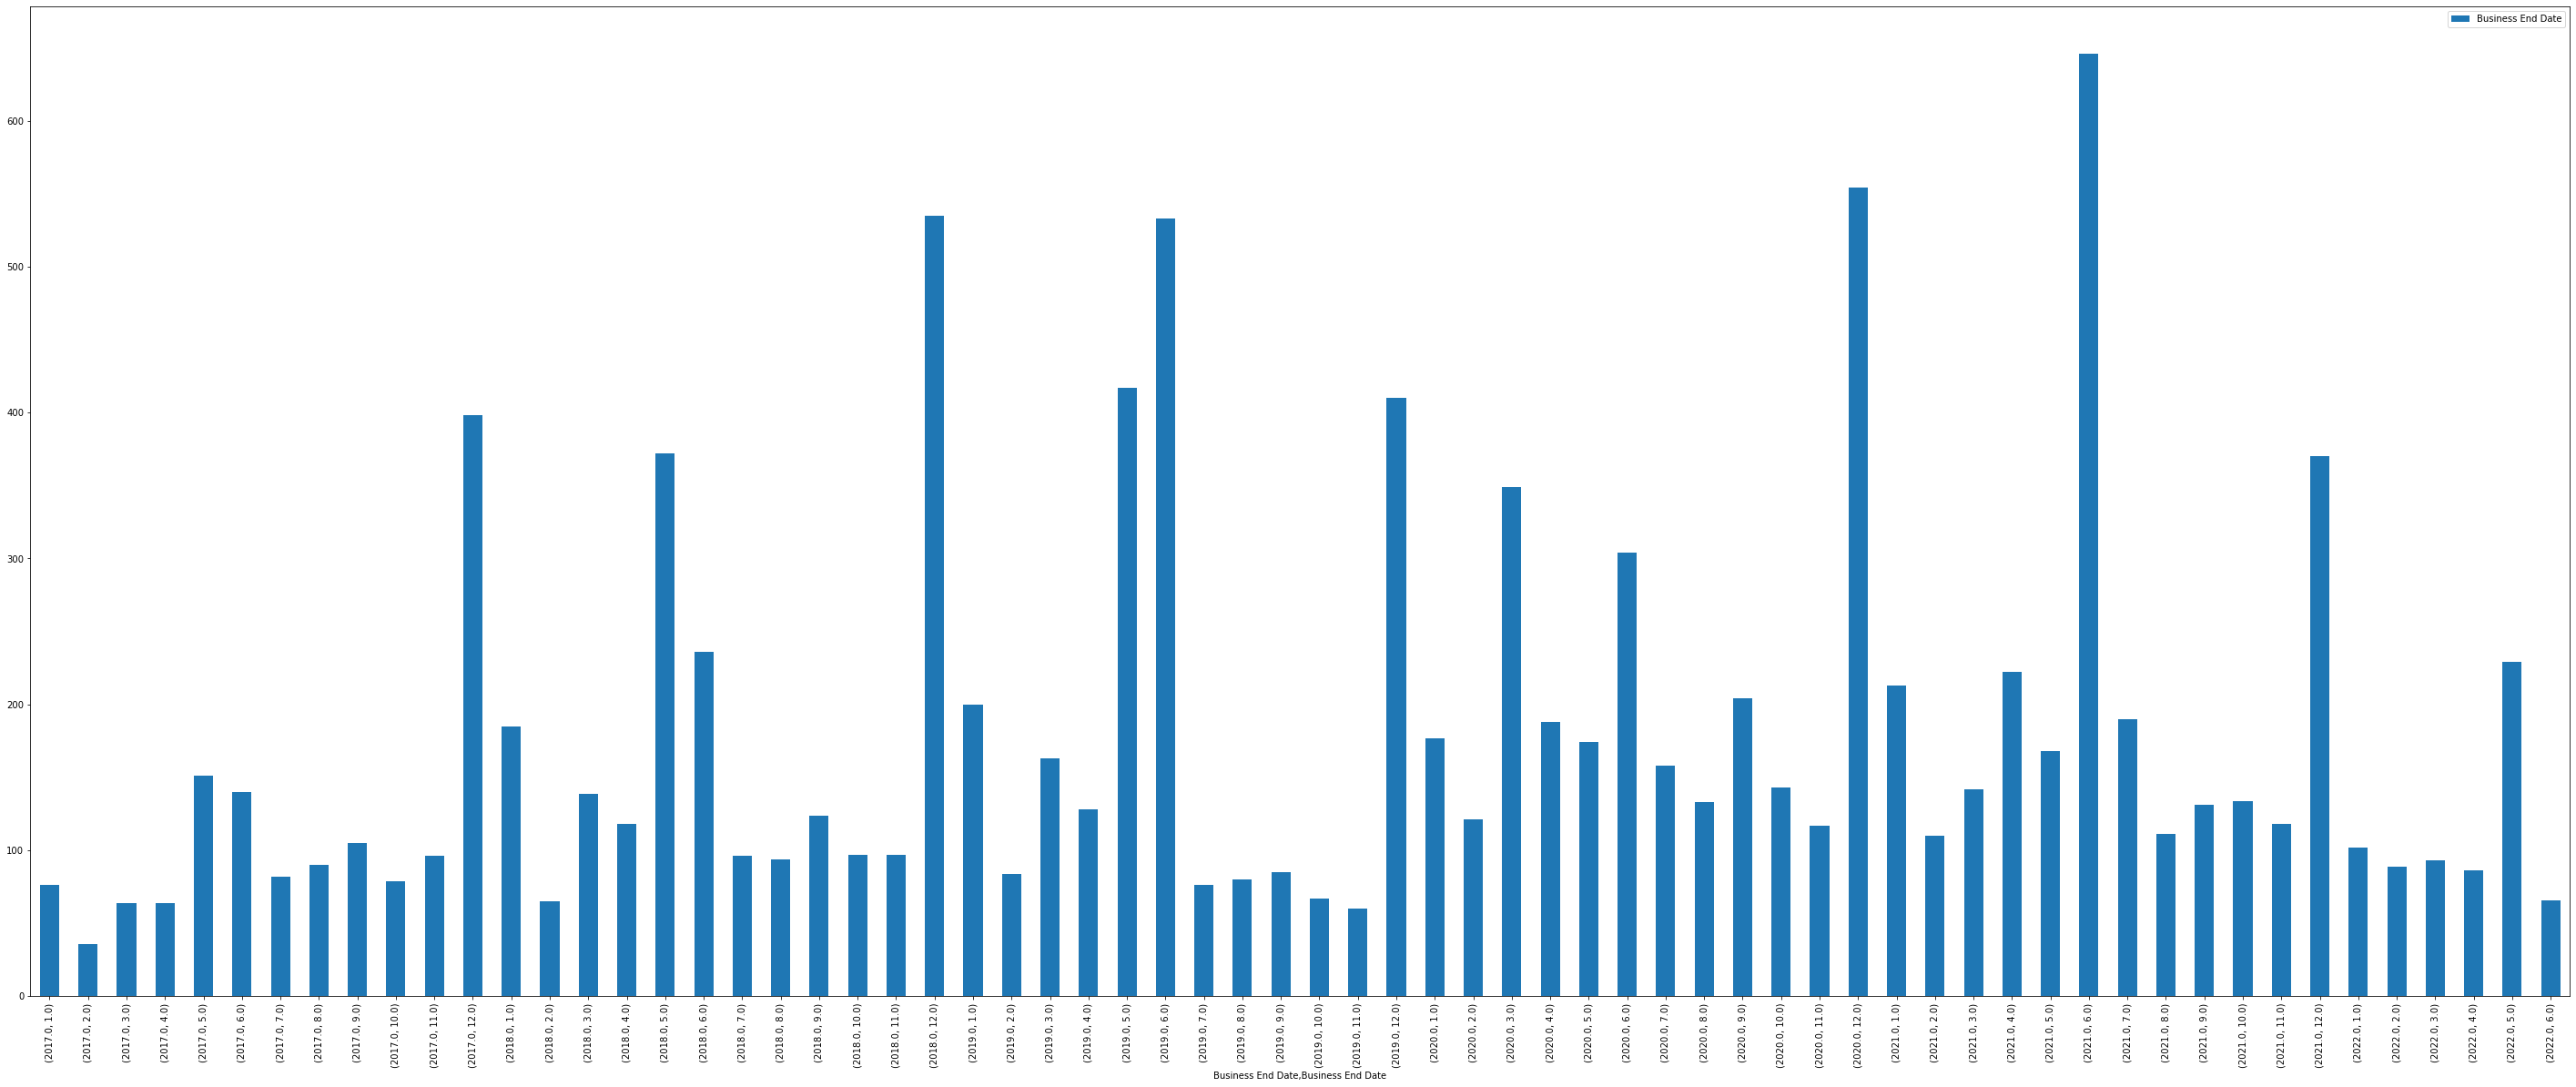

In [262]:
# Business closures by month by year for Businesses in Group B sectors

dataNC = dataN.loc[(dataN['NAICS Code Description'] == 4) | 
                   (dataN['NAICS Code Description'] == 10) |
                   (dataN['NAICS Code Description'] == 11) |
                   (dataN['NAICS Code Description'] == 13) |
                   (dataN['NAICS Code Description'] == 14)]

dataNC['Business End Date'] = dataNC['Business End Date'].astype("datetime64")
(dataNC
 .groupby([dataNC['Business End Date'].dt.year, dataNC['Business End Date'].dt.month])
 [['Business End Date']]
 .count()
 .plot(kind="bar", figsize=(50,20)))

In [273]:
dead = pd.DataFrame((data
 .groupby([data['Business End Date'].dt.year, data['Business End Date'].dt.month], dropna=False)
 [['Business End Date']]
 .count()
))
dead

Business End Date
Business End Date Business End Date                   
2017.0            1.0                              862
                  2.0                              434
                  3.0                              609
                  4.0                              598
                  5.0                             1719
...                                                ...
2022.0            3.0                              321
                  4.0                              371
                  5.0                              950
                  6.0                              251
NaN               NaN                                0

[67 rows x 1 columns]

### 3. Key Findings

In [ ]:
#Summary of results/insights (discussion/critical analysis)
#You should carefully consider any weaknesses or potential caveats in your approach and present these too.

#location(district) vs annual income

During the data analysis we managed to significantly strip down the original data file to remove extraneous data and data that fell outside of the date range that we intended to examine. We began the data cleaning process by limiting the data to only rows containing businesses that closed before Jan 2017. This is because any businesses that closed before this point would not be relevant to our investigation into the pandemic. Afterward we went through the other columns one by one to remove all data that was not useful. Some were discarded because it was simply irrelevant (parking and taxes) and others contained data that was too dirty to be used. 

After this process was complete we examined the remaining data by creating histograms of the number of businesses that closed in each month of each year. To gain insight into which business sectors were most affected by the pandemic, we segmented the data by business sector, as well as into two main groups. Our assumption being that more traditional brick and mortar service-oriented businesses such as restaurants, retail, and recreation would be the business sectors most seriously impacted by the pandemic. 

After plotting out these histograms we were able to verify that the business sectors that we originally grouped into more service oriented business did in fact see a noticeable increase in business closures after the beginning of the pandemic, while other companies did not see a noticeable change after. 


In later iterations of this project I have several areas that I would like to investigate, as well as data visualizations I would like to display. 

I was unable to acquire more data on the companies that appear on the list above. There are multiple very large companies such as Uber and Salesforce that are headquartered in San Francisco, however in the data source they are represented mostly the same as a small local sandwich shop. If I had more data on the annual revenue or even the number of people employed by each company in the dataset, I would be able to roughly 'weight' each company by its contribution to San Francisco's economy. 

I also ran into difficulty with creating some of the data visualizations I wanted to use. I ran into a lot of difficulty with plotting the data on a map of San Francisco. A heat map-stype visualization would have displayed the number of business closures pre and post pandemic in a very intuitive way. As things are with my current knowledge of Python, I am limited mostly to representing data in histogram form. 


### 4. Conclusion

In [ ]:
#Conclusion and further work.

The goal of this proposal was to ascertain the extent of the economic impact that the Covid-19 pandemic has had on local businesses from a geographic and business sector perspective in the city of San Francisco. The data we used was provided by the city itself. We attempted to determine exactly which districts and business sectors have been disproportionately affected by the pandemic. This will allow us to make a proposal for which areas and sectors should be targeted to provide the most impact for government aid and business loans. 

During the course of our analysis we were able to determine that the pandemic, did in fact have a marked effect on certain business sectors, specifically those involving retail trade, food services, Insurance and Information. Other sectors that were deemed to be more 'remote' in Group A such as Technical Services, Private Education, and Entertainment did not see a significant change in number of businesses that closed before and after the pandemic began. 


### 5. References/Resources

Data Sources

Registered Businesses Sorted by Location
https://data.sfgov.org/Economy-and-Community/Registered-Businesses-sorted-by-End-Date/vupz-6rcv
Registered Business Locations
https://data.sfgov.org/Economy-and-Community/Registered-Business-Locations-San-Francisco/g8m3-pdis
